# Image Registration

There are various ways to achieve image alignment, such as homography matrix, phase cross correlation or optical overflow. In this notebook we shall explore the very opular phase cross correlation technique. 

Phase cross correlation uses cross correlation on fourier space. 


In [1]:
!pip install scikit-image==0.17.1

     |████████████████████████████████| 12.3MB 295kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2


In [2]:
from google.colab import files

uploaded = files.upload()#creating file input stream

for fn in uploaded.keys():#getting the input bytes
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))#get name and length of file

Saving AS_09125_050116030001_D03f00d0.tif to AS_09125_050116030001_D03f00d0.tif
Saving AS_09125_050116030001_D03f00d0_shifted.tif to AS_09125_050116030001_D03f00d0_shifted.tif
User uploaded file "AS_09125_050116030001_D03f00d0.tif" with length 233336 bytes
User uploaded file "AS_09125_050116030001_D03f00d0_shifted.tif" with length 262292 bytes


In [18]:
import numpy as np
import matplotlib.pyplot as plt
 
from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift
from skimage import io
from skimage import filters
from scipy.ndimage.fourier import fourier_shift
import cv2

In [22]:
image = io.imread('AS_09125_050116030001_D03f00d0.tif')#original image
offset_image = io.imread('AS_09125_050116030001_D03f00d0_shifted.tif')#shifted image
shift, error, diffphase = phase_cross_correlation(image, offset_image,upsample_factor=100)

print("Known required shift y,x : -{} , -{}".format(15,15))
print("Found shift y,x: ", shift)

Known required shift y,x : -15 , -15
Found shift y,x:  [-14.99 -14.97]


In [23]:
height, width = offset_image.shape[:2] 
  
 
x=shift[1]
y=shift[0]
T = np.float32([[1, 0, x], [0, 1, y]]) #creating translation matrix

img_translation = cv2.warpAffine(offset_image, T, (width, height))#translate image

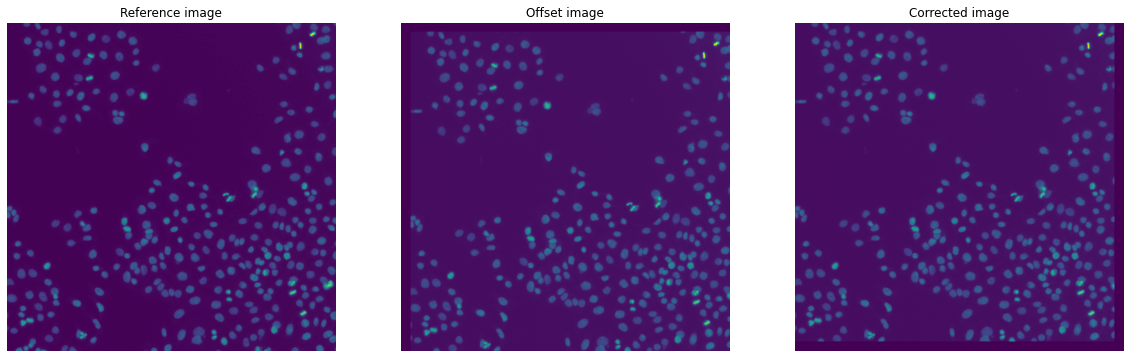

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 20))
ax1.imshow(image)
ax1.set_axis_off()
ax1.set_title('Reference image')

ax2.imshow(offset_image)
ax2.set_axis_off()
ax2.set_title('Offset image')

ax3.imshow(img_translation)
ax3.set_axis_off()
ax3.set_title("Corrected image")


plt.show()